In [1]:
options(warn=-1)
options("getSymbols.warning4.0"=FALSE)
suppressMessages(library(quantmod))

In [11]:
normalize_series <- function(xdat) (xdat-coredata(xdat)[1]) / coredata(xdat)[1]
pct.change <- function(x1, x2) round((x2-x1)/x1*100)

In [12]:
symbols <- c('SHOP','SCHG')
sold.at <- 677.00
sold.date <- '2020-05-05'
bought.at <- 91.60
bought.date <- '2020-05-06'

In [13]:
qts <- getQuote(symbols)
shop.qts <- qts['SHOP',]
schg.qts <- qts['SCHG',]
print(c(shop.qts$Last,schg.qts$Last))
getSymbols(symbols)

[1] 1053.59  107.72


[1] "SHOP" "SCHG"

In [14]:
print(paste("SCHG: ", pct.change(bought.at,schg.qts$Last), "%", sep=""))
print(paste("SHOP: ", pct.change(sold.at,shop.qts$Last), "%", sep=""))

[1] "SCHG: 18%"
[1] "SHOP: 56%"


In [15]:
options(repr.plot.width=16, repr.plot.height=10)
last.number.of.days <- 30
#date.range=paste(Sys.Date()-last.number.of.days, '/')
#chartSeries(SHOP[date.range], theme=chartTheme('white'))
date.range <- paste(as.Date(bought.date), '/', sep='')
date.range

[1] "2020-05-06/"

In [20]:
nSCHG <- (normalize_series(Cl(SCHG)[date.range]))*100
nSHOP <- (normalize_series(Cl(SHOP)[date.range]))*100

In [22]:
tail(nSHOP)

           SHOP.Close
2020-07-21   29.89652
2020-07-22   30.51000
2020-07-23   26.56741
2020-07-24   26.75827
2020-07-27   33.10839
2020-07-28   34.28216

In [23]:
tail(Cl(SHOP[date.range]))
pct.change(677,686.11)

           SHOP.Close
2020-07-21     952.83
2020-07-22     957.33
2020-07-23     928.41
2020-07-24     929.81
2020-07-27     976.39
2020-07-28     985.00

[1] 1

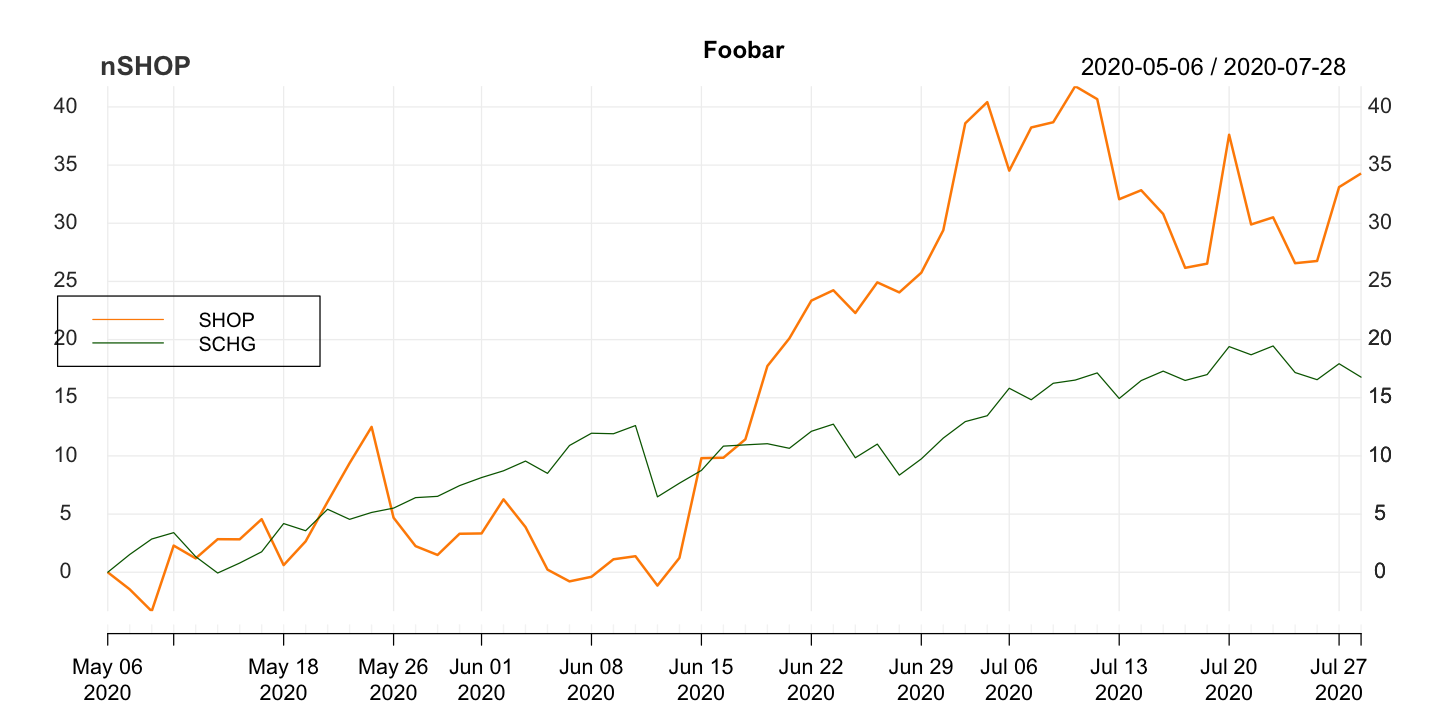

In [27]:
options(repr.plot.width=12, repr.plot.height=6)
mytheme = chart_theme()
#mytheme$fg.col = "white" # Border Text
#mytheme$bg.col = "white" # Border color
#mytheme$grid.col = "white" # Grid lines
#mytheme$border = "white"
#mytheme$minor.tick = "white" # Ticks
#mytheme$major.tick = "white" # Ticks
#mytheme$up.col = "white"  # Color of the line
#mytheme$dn.col = "white"
#mytheme$dn.up.col = "white"
#mytheme$up.up.col = "white"
#mytheme$dn.dn.col = "white"
#mytheme$up.dn.col = "white"
#mytheme$up.border = "white"
#mytheme$dn.border = "white"
#mytheme$dn.up.border = "white"
#mytheme$up.up.border = "white"
#mytheme$dn.dn.border = "white"
#mytheme$up.dn.border = "white"
#mytheme$main.col = "white"
#mytheme$sub.col = "white"
#mytheme$area = "white"
#mytheme$fill = "white"
#mytheme$Expiry = "white"
#mytheme$theme.name = 'white'
#mytheme$col$line.lty = 2
date.range = paste(as.Date(bought.date)-1, "/", sep="")
#par(cex=1.5)
{
myPars <- chart_pars()
myPars$cex=1.2
myPars$mar <- c(3,2,1,1)
chart_Series(
    nSHOP,
    pars=myPars,
    theme=mytheme,
    col='darkorange'
)
add_TA(nSCHG, on=1, col='darkgreen')
}
title("Foobar")
legend("left", legend = c( 'SHOP', 'SCHG'), col = c('darkorange', 'darkgreen'), lty=1)